<a href="https://colab.research.google.com/github/kennyerss/csci451-project/blob/main/code/CS451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade efficientnet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=37f5691b17c5e0006886256485235c29a705f62f40f678998c7c982e58d03385
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [2]:
#need to import Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/Shareddrives/"

# choose where you want your project files to be saved
project_folder = "CheXpert-v1.0-small/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place

create_and_set_working_directory(project_folder)

## Image Visualization

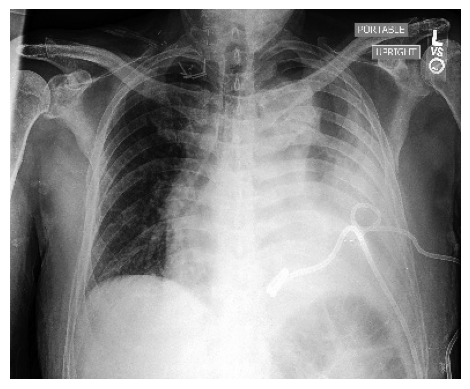

In [5]:
#This just will show the images

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00142/study3/view1_frontal.jpg')
#img = cv2.imread('/content/drive/MyDrive/chexpert_small/train/patient00974/study1/view1_frontal.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

## Data Analysis

We have a few different dataframes to work on. The first is what we define as df_race, which gives the patients race and ethnicity based on their ID. Here we define a sorted version so the patients will be in order by their ID.

In [6]:
# import our race data set and load as a dataframe

import pandas as pd

df_race = pd.read_excel('/content/drive/Shareddrives/CheXpert-v1.0-small/chexpert_race.xlsx')
df_race_sorted = df_race.sort_values(by=['PATIENT'],ignore_index=True)
df_race_sorted = df_race_sorted.dropna()
df_race_sorted

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino
1,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
2,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino
3,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino
4,patient00005,Male,33,White,Non-Hispanic/Non-Latino
...,...,...,...,...,...
65396,patient65731,Female,64,White,Non-Hispanic/Non-Latino
65397,patient65732,Female,0,Asian,Non-Hispanic/Non-Latino
65398,patient65735,Female,1,White,Non-Hispanic/Non-Latino
65399,patient65739,Female,44,Unknown,Non-Hispanic/Non-Latino


['Other' 'White, non-Hispanic' 'Black or African American' 'White'
 'Native Hawaiian or Other Pacific Islander' 'Asian' 'Asian, non-Hispanic'
 'Unknown' 'Native American, non-Hispanic' 'Race and Ethnicity Unknown'
 'White, Hispanic' 'Other, Hispanic' 'Black, non-Hispanic'
 'American Indian or Alaska Native' 'Patient Refused'
 'Other, non-Hispanic' 'Pacific Islander, Hispanic' 'Black, Hispanic'
 'Pacific Islander, non-Hispanic' 'White or Caucasian' 'Asian, Hispanic'
 'Native American, Hispanic' 'Asian - Historical Conv']
White: 36768
 Asian: 7061
 Black: 3147
 Native American: 181
 Pacific Islander: 881
 Other/Unknown: 16817


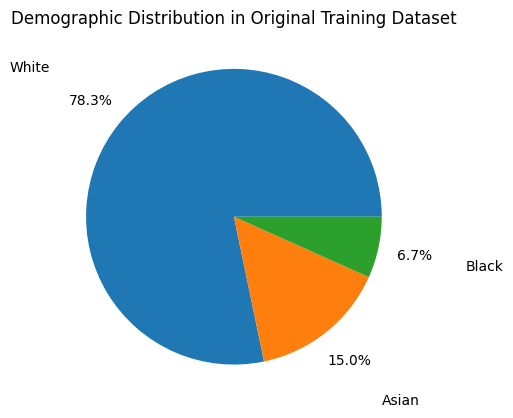

In [7]:
import matplotlib.pyplot as plt

# print the unique labels for race - we need to make some determinations here
print(df_race_sorted['PRIMARY_RACE'].unique())
white_no = (df_race_sorted['PRIMARY_RACE'].str.contains('White')).sum()
black_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Black')).sum()
asian_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Asian')).sum()
native_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Native American')).sum()
native_no += (df_race_sorted['PRIMARY_RACE'].str.contains('Indian')).sum()
islander_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Pacific')).sum()
rest_no = len(df_race_sorted) - white_no - black_no - asian_no - native_no - islander_no

print('White: ' + str(white_no) + '\n Asian: ' + str(asian_no) + '\n Black: ' + str(black_no) + '\n Native American: ' + str(native_no) + '\n Pacific Islander: '
+ str(islander_no) + '\n Other/Unknown: ' + str(rest_no))

labels = ['White', 'Asian', 'Black']
sizes = [white_no, asian_no, black_no]

plt.pie(sizes, labels = labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=1.6)
plt.title('Demographic Distribution in Original Training Dataset')
plt.show()


In [8]:
df_race.groupby(['GENDER', 'PRIMARY_RACE']).mean()

<ipython-input-8-8553b8aa5c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race.groupby(['GENDER', 'PRIMARY_RACE']).mean()


AGE_AT_CXR
GENDER PRIMARY_RACE                                         
Female American Indian or Alaska Native            56.855422
       Asian                                       61.089804
       Asian - Historical Conv                     25.000000
       Asian, Hispanic                             60.000000
       Asian, non-Hispanic                         63.362667
       Black or African American                   55.641553
       Black, Hispanic                             54.545455
       Black, non-Hispanic                         60.887029
       Native American, Hispanic                   71.250000
       Native American, non-Hispanic               55.818182
       Native Hawaiian or Other Pacific Islander   50.019465
       Other                                       55.001051
       Other, Hispanic                             57.885922
       Other, non-Hispanic                         56.272727
       Pacific Islander, Hispanic                  57.000000
       Pacific Islander, non-Hispanic              60.844444
       Patient Refused                             54.409091
       Race and Ethnicity Unknown                  60.310212
       Unknown                                     59.574136
       White                                       64.096811
       White or Caucasian                          37.333333
       White, Hispanic                             59.041322
       White, non-Hispanic                         67.988264
Male   American Indian or Alaska Native            54.546875
       Asian                                       60.323556
       Asian, Hispanic                             73.250000
       Asian, non-Hispanic                         62.407240
       Black or African American                   54.075443
       Black, Hispanic                             55.000000
       Black, non-Hispanic                         53.776978
       Native American, Hispanic                   45.111111
       Native American, non-Hispanic               49.300000
       Native Hawaiian or Other Pacific Islander   54.032258
       Other                                       52.828869
       Other, Hispanic                             49.538240
       Other, non-Hispanic                         59.725664
       Pacific Islander, Hispanic                  47.000000
       Pacific Islander, non-Hispanic              52.877551
       Patient Refused                             54.325581
       Race and Ethnicity Unknown                  57.626587
       Unknown                                     57.316144
       White                                       62.296407
       White or Caucasian                          29.500000
       White, Hispanic                             50.898396
       White, non-Hispanic                         63.368680

Looking at the ethnicities, we can see the main groups are Hispanic/Latino and Non-Hispanic/Non-Latino (along with Not Hispanic which is a bit confusing). The Unknown or Patient Refused Categories also exist of course.

In [9]:
#print the unique labels for ethnicity
print(df_race['ETHNICITY'].unique())

['Non-Hispanic/Non-Latino' 'Hispanic/Latino' 'Unknown' nan
 'Patient Refused' 'Hispanic' 'Not Hispanic']


In [10]:
#subset data by the "Other" listed for Race
df_race[df_race['PRIMARY_RACE'] == 'Other']

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
1,patient48289,Female,39,Other,Hispanic/Latino
13,patient51575,Male,68,Other,Hispanic/Latino
32,patient28670,Male,63,Other,Hispanic/Latino
53,patient65275,Female,59,Other,Non-Hispanic/Non-Latino
61,patient54887,Male,74,Other,Hispanic/Latino
...,...,...,...,...,...
65386,patient33297,Female,40,Other,Hispanic/Latino
65390,patient15562,Female,50,Other,Hispanic/Latino
65395,patient32620,Female,21,Other,Hispanic/Latino
65396,patient65702,Male,1,Other,Hispanic/Latino


Our next important dataframe is df_patients, which holds a csv of image links with the sex, age, and other features of the patients related to their hospitalization. Notice that the patient ID is included inside the text for the links. Also, notice that one patient can have multiple images from different visiting times. Images are in two categories frontal and lateral (front of body vs. side of body).

In [11]:
df_patients = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train.csv')
df_patients

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


We do some basic data cleaning by adding a column for the patient ID (extracted from the image links). We also turn race into numeric categories: 0 - White, 1 - Black, 2 - Asian, 3 - Other. Notice that the first three groups, any race identification containing White, for example, whether 'White, Hispanic' or 'White, Caucasian' will be classified as white.

In [12]:
#again, df_patients['PATIENT'] holds links for the file directory, here I split so instead I can have the patient ID
df_patients['PATIENT'] = [df_patients['Path'][i].split("/")[2] for i in range(df_patients.shape[0])]

#I then merge the patient race with df_race_sorted, which will give me the patient ID - race
df_patients_race = pd.merge(df_patients,df_race_sorted,on='PATIENT')
"""
#check
for index, row in df_patients_race[206949:].iterrows():
  race_sorted_index = df_race_sorted.index[df_race_sorted["PATIENT"] == row["PATIENT"]].tolist()
  if (len(race_sorted_index) != 1):
    print("error!")
    break
  i = race_sorted_index[0]
  if not (row['PATIENT'] in row['Path']):
    print(row,"patient error!")
    break
  if not (row['ETHNICITY'] == df_race_sorted["ETHNICITY"][i]):
    print(row,"ethnicity error!",row['ETHNICITY'],df_race_sorted["ETHNICITY"][i])
    break
  if not (row['PRIMARY_RACE'] == df_race_sorted["PRIMARY_RACE"][i]):
    print(row,"race error!")
    break
  if not (row['Sex'] == df_race_sorted["GENDER"][i]):
    print(row,"sex error!")
    break
"""

#there is a gender error for patient 51668, index 202352
# gender error for patient 54170, index 206312
# gender error for patient 54565, index 206948

def race_to_num(string):
  if 'White' in string:
    return 0
  elif 'Black' in string:
    return 1
  elif 'Asian' in string:
    return 2
  else:
    return 3

df_patients_race["RACE_NUM"] = [race_to_num(df_patients_race["PRIMARY_RACE"][i]) for i in range(len(df_patients_race))]

df_patients_race

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino,3
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220992,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,patient64535,Male,60,Black or African American,Non-Hispanic/Non-Latino,1
220993,CheXpert-v1.0-small/train/patient64536/study2/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,patient64536,Female,61,Other,Hispanic/Latino,3
220994,CheXpert-v1.0-small/train/patient64536/study1/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,patient64536,Female,61,Other,Hispanic/Latino,3
220995,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,1.0,NaN,NaN,NaN,patient64537,Male,59,Black or African American,Non-Hispanic/Non-Latino,1


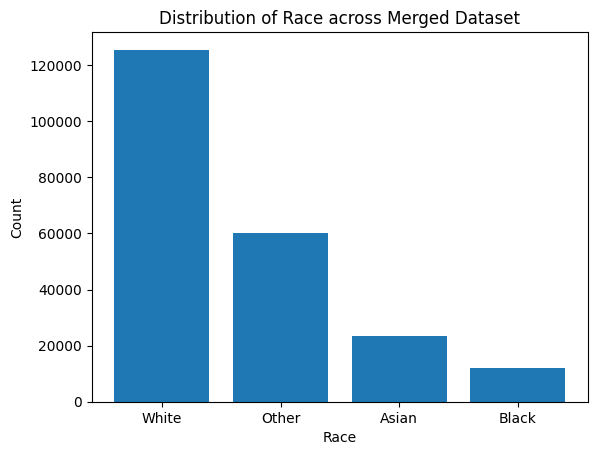

In [13]:
# Visualization of the presence of each 'merged' race
import numpy as np 
import matplotlib.pyplot as plt

bars = ('White', 'Other', 'Asian', 'Black')
x_pos = np.arange(len(bars))
height = df_patients_race['RACE_NUM'].value_counts()
plt.bar(bars, height)

# Add title and axis names
plt.title('Distribution of Race across Merged Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
 
# Create names on the x axis
plt.xticks(x_pos, bars)

plt.show()

We wanted to recreate the results of the paper, and they focused only on White, Black, and Asian groups. We will therefore subset our data only by these populations.

In [14]:
df_patients_bwa = df_patients_race[df_patients_race['PRIMARY_RACE'].str.contains('White|Black|Asian')==True]
df_patients_bwa

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220990,CheXpert-v1.0-small/train/patient64533/study2/...,Male,75,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient64533,Male,75,White,Non-Hispanic/Non-Latino,0
220991,CheXpert-v1.0-small/train/patient64534/study1/...,Male,63,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,0.0,NaN,NaN,NaN,patient64534,Male,63,White,Non-Hispanic/Non-Latino,0
220992,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,patient64535,Male,60,Black or African American,Non-Hispanic/Non-Latino,1
220995,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,1.0,NaN,NaN,NaN,patient64537,Male,59,Black or African American,Non-Hispanic/Non-Latino,1


So df_patients_bwa is df_patients_race but with the "Other" category dropped - just Black, White, and Asian. The csv train_bwa is the first 72000 images of df_patients_bwa. The csv valid_bwa is the 72000-90000 images.

Then I have created the csv train_bwa_equal, which took the first 6000 images from each group of train_bwa and shuffled them. I chose 6000, because there are 6146 Black people in train_bwa (which is the smallest group). The csv valid_bwa_equal takes 1000 images from each group of valid_bwa and shuffled them. I chose 1000 because there are 1281 images belonging to Black patients in valid_bwa.

In [15]:
print(df_patients_bwa['PRIMARY_RACE'].unique())
print(df_patients_bwa['RACE_NUM'].unique())

['White, non-Hispanic' 'Black or African American' 'White' 'Asian'
 'Asian, non-Hispanic' 'White, Hispanic' 'Black, non-Hispanic'
 'Black, Hispanic' 'White or Caucasian' 'Asian, Hispanic'
 'Asian - Historical Conv']
[0 1 2]


In [16]:
df_patients_race.groupby("RACE_NUM").size()

RACE_NUM
0    125483
1     11961
2     23272
3     60281
dtype: int64

In [17]:
df_patients_bwa[:72000].groupby("RACE_NUM").size()

RACE_NUM
0    55314
1     6146
2    10540
dtype: int64

In [18]:
df_patients_bwa[72000:90000].groupby("RACE_NUM").size()

RACE_NUM
0    14203
1     1281
2     2516
dtype: int64

In [19]:
df_train_bwa = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train_bwa.csv')
df_test_bwa = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/test_bwa.csv')

df_train_bwa_equal = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train_bwa_equal.csv')
df_test_bwa_equal = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/test_bwa_equal.csv')

df_train_bwa_frontal = df_train_bwa[df_train_bwa['Path'].str.contains('frontal')==True]
df_test_bwa_frontal = df_test_bwa[df_test_bwa['Path'].str.contains('frontal')==True]

df_train_bwa_equal_frontal = df_train_bwa_equal[df_train_bwa_equal['Path'].str.contains('frontal')==True]
df_test_bwa_equal_frontal = df_test_bwa_equal[df_test_bwa_equal['Path'].str.contains('frontal')==True]

#Test if sets have any patients in common
print(set(df_train_bwa['Path'].unique().tolist()) & set(df_test_bwa['Path'].unique().tolist()))
print(set(df_train_bwa_equal['Path'].unique().tolist()) & set(df_test_bwa_equal['Path'].unique().tolist()))
print(set(df_train_bwa_equal['Path'].unique().tolist()) & set(df_test_bwa['Path'].unique().tolist()))
print(set(df_train_bwa['Path'].unique().tolist()) & set(df_test_bwa_equal['Path'].unique().tolist()))

set()
set()
set()
set()


In [20]:
df_train_bwa_equal_frontal.groupby("RACE_NUM").size()

RACE_NUM
0    4776
1    4819
2    4641
dtype: int64

In [21]:
df_test_bwa_equal_frontal.groupby("RACE_NUM").size()

RACE_NUM
0    817
1    759
2    775
dtype: int64

TODO: Should do analysis on number of patients in each subset, etc.

In [22]:
df_train_bwa

,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
0,1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,...,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
1,2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
2,3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
3,4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
4,5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,98819,CheXpert-v1.0-small/train/patient24018/study1/...,Male,88,Frontal,PA,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,patient24018,Male,88,White,Non-Hispanic/Non-Latino,0
71996,98820,CheXpert-v1.0-small/train/patient24018/study1/...,Male,88,Lateral,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,patient24018,Male,88,White,Non-Hispanic/Non-Latino,0
71997,98821,CheXpert-v1.0-small/train/patient24018/study5/...,Male,88,Frontal,AP,NaN,NaN,0.0,1.0,...,0.0,NaN,NaN,1.0,patient24018,Male,88,White,Non-Hispanic/Non-Latino,0
71998,98822,CheXpert-v1.0-small/train/patient24018/study2/...,Male,88,Frontal,AP,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,1.0,patient24018,Male,88,White,Non-Hispanic/Non-Latino,0


This last bit of code was to check that all the images linked to our loaded data actually exist.

In [23]:
i = 124000

import os

#ran already, found anomaly only with patient 11019
"""
for index, row in df_patients_race[124000:125000].iterrows():
    row_path_list = row['Path'].split("/")
    row_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3],row_path_list[4])
    
    dir_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3])
    os.chdir(dir_path)

    if (i % 1000 == 0):
      print(i, row_path_list[2])

    if not os.path.isfile(row_path_list[4]):
      print(row_path)

    #print(row_path)

    #print(i)
    
    
    #if not os.path.isfile(row_path):
    #  print(row_path)
    i += 1
"""

'\nfor index, row in df_patients_race[124000:125000].iterrows():\n    row_path_list = row[\'Path\'].split("/")\n    row_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3],row_path_list[4])\n    \n    dir_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3])\n    os.chdir(dir_path)\n\n    if (i % 1000 == 0):\n      print(i, row_path_list[2])\n\n    if not os.path.isfile(row_path_list[4]):\n      print(row_path)\n\n    #print(row_path)\n\n    #print(i)\n    \n    \n    #if not os.path.isfile(row_path):\n    #  print(row_path)\n    i += 1\n'

In [24]:
df_patients_bwa.groupby("RACE_NUM").size()

RACE_NUM
0    125483
1     11961
2     23272
dtype: int64

In [25]:
white_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('White')==True).sum()
black_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('Black')==True).sum()
asian_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('Asian')==True).sum()

print("Average photos: ",125483/white_patients_size)
print("Average photos: ",11961/black_patients_size)
print("Average photos: ",23272/asian_patients_size)

Average photos:  3.4128318102698
Average photos:  3.8007626310772165
Average photos:  3.2958504461124485


## Data Preparation and Loading

In [26]:
import sys
import os
from pathlib import Path
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import optim

import torchvision.transforms as transforms
import torchvision

from fastprogress import master_bar, progress_bar

from PIL import Image

IMAGENET_MEAN = [0.485, 0.456, 0.406]         # Mean of ImageNet dataset (used for normalization)
IMAGENET_STD = [0.229, 0.224, 0.225]          # Std of ImageNet dataset (used for normalization)


#I used a lot of code from https://www.kaggle.com/code/hmchuong/chexpert-pytorch-densenet121?scriptVersionId=18314696&cellId=15

class ChestXrayDataset(Dataset):

  def __init__(self,folder_dir,dataframe,image_size,normalization):
    #a lot of this function is 
    # folder_dir is the directory path to the data
    # dataframe holds patient info and labels
    # it takes in our image labels

    self.image_paths=[]
    self.image_labels=[]

    #This transforms our image, I think we would also need normalization
    # #original paper has random zoom, we did not implement that
    image_transformation = [
        #transforms.Grayscale(num_output_channels=1), #ONLY USE FOR PYTORCH XRAY
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15)]

    #this normalizes using some constants from imagenet
    if normalization:
    #  #ONLY COMMENT OUT FOR PYTORCH XRAY
      image_transformation.append(transforms.Normalize(IMAGENET_MEAN,IMAGENET_STD))
    #  #image_transformation.append(transforms.Normalize([0.485],[0.229]))

    self.image_transformation = transforms.Compose(image_transformation)

    #this will index through all the patients from 000001, so forth, adding images from study1
    for index, row in dataframe.iterrows():
      
      #image_path = os.path.join(folder_dir,Path(row['PATIENT']),Path('study1'),Path('view1_frontal.jpg'))

      #here I use lateral and frontal images
      #OLD CODE
      #row_path_list = row['Path'].split("/")
      #image_path = os.path.join(folder_dir,row_path_list[2],row_path_list[3],row_path_list[4])
      
      image_path = os.path.join(folder_dir,row['Path'])

      #if (os.path.isfile(image_path)):
      self.image_paths.append(image_path)
      #else:
      #  continue
      #in this case I've hard-coded the image_labels to be if the patient is Black or not
      #NOTICE that I'm append a list to a list here
      
      image_label = []

      image_label.append(int(row["RACE_NUM"]))
      
      """
      if ( row["PRIMARY_RACE"] ==  'White' or row["PRIMARY_RACE"] == 'White, non-Hispanic' or row["PRIMARY_RACE"] == 'White or Caucasian'):
        image_label.append(1)
      #else:
      #  image_label.append(0)
      elif ( row["PRIMARY_RACE"] ==  'Black or African American' or row["PRIMARY_RACE"] == 'Black, non-Hispanic'):
        image_label.append(2)
      #else:
      #  image_label.append(0)

      elif ( row["PRIMARY_RACE"] ==  'Asian' or row["PRIMARY_RACE"] == 'Asian, non-Hispanic' or row["PRIMARY_RACE"] == 'Asian - Historical Conv' or row['PRIMARY_RACE'] == 'Asian - Historical Conv'):
        image_label.append(3)
      else:
        image_label.append(0)
      """

      #DELETE THIS IF NOT USING TORCH XRAY
      #for i in range(17):
      #  image_label.append(5)
      
      self.image_labels.append(image_label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self,index):
    #This is also just necessary for other parts

    # Read image
    image_path = self.image_paths[index]
    #ONLY COMMENT OUT FOR PYTORCH XRAY
    image_data = Image.open(image_path).convert("RGB")
    image_data = self.image_transformation(image_data)
      
    return image_data, torch.FloatTensor(self.image_labels[index])



In [27]:
IMAGE_SIZE = 224                              # Image size (224x224)
BATCH_SIZE = 50                        
# BATCH_SIZE = 1728 #ONLY FOR PYTORCH XRAY VISION
LEARNING_RATE = 0.001
LEARNING_RATE_SCHEDULE_FACTOR = 0.1           # Parameter used for reducing learning rate
LEARNING_RATE_SCHEDULE_PATIENCE = 5           # Parameter used for reducing learning rate
MAX_EPOCHS = 2                              # Maximum number of training epochs

Define the dataset object here

In [ ]:
#train_dataset = ChestXrayDataset("/content/drive/Shareddrives/CheXpert-v1.0-small/train", df_train_race_mod, race_is_white, IMAGE_SIZE, True)

#train the dataset with the first 2000 images, this includes frontal and lateral images
train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[:6000], IMAGE_SIZE, True)

import numpy as np
print(train_dataset.image_labels[:10])
print(train_dataset.image_paths[:10])
print("dataset length: ", len(train_dataset))

[[2], [2], [2], [1], [1], [0], [1], [1], [1], [0]]
['/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00078/study3/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient01622/study3/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient02945/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient16701/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient05235/study3/view2_lateral.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient01538/study3/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient04830/study3/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient11839/study6/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient04499/study1/view2_lateral.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient02462/study12/view2_lateral.jpg

Create the loader for the dataset here - basically it is nice to have this so we can load the data in batches when we need instead of loading the entire dataset onto RAM, which is costly and slow.

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, num_workers=2, shuffle=True, pin_memory=True)

In [ ]:
#I believe that this functions as a test - if this block returns an error, there is a problem with dataloading
for data, label in train_dataloader:
    print(data.size())
    print(label.size())
    break

torch.Size([20, 3, 224, 224])
torch.Size([20, 1])


In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Defining some functions now to train our model:

In [29]:
import torch.optim as optim

def train(model, trainloader, optimizer, k_epochs = 1, print_every = 2000, loss_fn = nn.CrossEntropyLoss()):

    begin = time.time()

    #if using pretrained model
    model.train()

    for epoch in range(k_epochs): 

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):

            X, y = data
            X = X.to(device)
            
            #need to flatten y - this holds labels for each image in the batch, but as a list of a list
            y = torch.flatten(y)
            y = y.to(torch.long)
            y = y.to(device)

            optimizer.zero_grad()

            y_hat = model(X)

            loss = loss_fn(y_hat, y)
            loss.backward()

            optimizer.step()

            running_loss += loss.item()

            # print the epoch, number of batches processed, and running loss 
            # in regular intervals
            if i % print_every == print_every - 1:    
                print(f'[epoch: {epoch + 1}, batches: {i + 1:5d}], loss: {running_loss / print_every:.3f}')
                running_loss = 0.0

    end = time.time()
    print(f'Finished training in {round(end - begin)}s')

In [30]:
def test(model, testloader):
    correct = 0
    total = 0

    y_true = []
    y_pred = []

    #if model is pretrained
    model.eval()

    with torch.no_grad():
        for data, label in testloader:
            X = data
            y = label
            X = X.to(device)

            y = torch.flatten(label)
            y = y.to(torch.long)
            y = y.to(device)

            print(y)
            
            # run all the images through the model
            y_hat = model(X)

            #print(y_hat)

            # the class with the largest model output is the prediction
            _, predicted = torch.max(y_hat.data, 1)

            print("predicted: ",predicted)

            y_pred.extend(predicted.data.cpu().numpy()) 
            y_true.extend(y.data.cpu().numpy())

            # compute the accuracy
            total += y.size(0)
            correct += (predicted == y).sum().item()

            #print(total,correct)

    print(f'Test accuracy: {100 * correct // total} %')

    return y_pred, y_true

Resnet 18 Self-Implementation

In [86]:
#references https://arxiv.org/pdf/1512.03385.pdf, original resnet paper
# and https://blog.paperspace.com/writing-resnet-from-scratch-in-pytorch/ for pointers on code
# https://github.com/microsoft/nni/blob/master/examples/trials/cifar10_pytorch/models/resnet.py

import torch
import torch.nn as nn

class Resnet18(nn.Module):
  """
  for now I'm doing the 34 version
  """
  def __init__(self, num_classes):

    super(Resnet18,self).__init__() #is (Resnet,self) necessary?

    #want to take matrix 224*224 to 112*112, padding 3 ensures that each kernel 
    # centered on pixel in matrix, stride =2 makes it every other pixel, hence dimension is half
    self.conv1 = nn.Sequential(
      nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, stride = 2, padding=3), 
      nn.BatchNorm2d(num_features = 64),
      nn.ReLU()
    )
    #now do 3 by 3 max pool, similarly need padding 1 to make sure kernel
    # centered on each pixel, stride=2 make it other pixel, dimension 56*56
    self.maxpool = nn.MaxPool2d(kernel_size = 3,stride=2,padding=1) #not sure why there is padding

    #each time we reduce the size of the matrix by half, hence stride of 2 (for conv2_x, maxpool reduced dimension)
    self.conv2_x = self.make_conv_layer(64,64,kernel_size = 3, stride = 1, num_layers = 2)
    self.conv3_x = self.make_conv_layer(64,128,kernel_size = 3, stride = 2, num_layers = 2)
    self.conv4_x = self.make_conv_layer(128,256,kernel_size = 3, stride = 2, num_layers = 2)
    self.conv5_x = self.make_conv_layer(256,512,kernel_size = 3, stride = 2, num_layers = 2)

    #size is now [512,7,7], want it to be [512,1,1] so kernel size 7
    #self.avgpool = nn.AvgPool2d(kernel_size = 7,stride = 1) #no idea why this is 7
    self.avgpool = nn.AdaptiveAvgPool2d((1,1)) #this is what preloaded resnet34 has

    self.fc = nn.Linear(512,num_classes)

  #this is specific to resnet 34
  def make_conv_layer(self,in_channels, out_channels, kernel_size, stride, num_layers):
    #conv 1 - 64 out, conv2 - 64 in 64 out, 64 in 64 out, 64 in 64 out, conv3 - 64 in 128 out, 128 in 128 out
    
    layer_list = []

    in_ch = in_channels
  
    # first block is input stride, reset are stride of 1

    layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride))
    in_ch = out_channels

    for i in range(1,num_layers):
      layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride=1))

    return nn.Sequential(*layer_list)

  def forward(self,x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2_x(x)
    x = self.conv3_x(x)
    x = self.conv4_x(x)
    x = self.conv5_x(x)
    x = self.avgpool(x)
    
    #x = torch.flatten(x)
    x = x.view(x.size(0), -1) #not sure why but flatten doesn't work
    x = self.fc(x)
    return x


class ResidualBlock(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size,stride):
    """
    Some math, input kernel to conv2_x is [64,56,56], can just do stride 1, size maintained
    Input kernel to conv3_x is [64,56,56] want [128,28,28], after convolutions x is [128,28,28] (stride 2 at first then stride 1),
    But x is still [64,56,56], so no padding, use kernel size 1 with 128 outchannels and stride 2
    """

    super(ResidualBlock,self).__init__()
    #again note padding here is 1 because kernel is 3 by 3
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = 3, stride = stride, padding = 1),
        nn.BatchNorm2d(num_features = out_channels),
        nn.ReLU()
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels = out_channels, out_channels = out_channels, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(num_features = out_channels) #don't do ReLU here since we might downsample
    )

    self.skip_connection = nn.Sequential() #identity

    #idea here is that skip_connection will add the input x to itself
    # but if stride != 1 or in_channels != out_channels, we need to change dimensions of x
    # so that the dimensions of x after conv1 and conv2 applied
    if stride != 1 or in_channels != out_channels:
      self.skip_connection = nn.Sequential(
          nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=stride),
          nn.BatchNorm2d(num_features = out_channels)
      )
    self.ReLU = nn.ReLU()

  def forward(self,x):
    x_layer = self.conv1(x)
    x_layer = self.conv2(x_layer)
    x_layer += self.skip_connection(x)
    x_layer = self.ReLU(x_layer)
    return x_layer

Loading trained models

In [44]:
def load_model(filename, model, device):
  """
  Takes an untrained model as input, filename to saved model, and the device
  """
  #model = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)
  checkpoint = torch.load(filename, map_location=device)
  print('Loading trained model weights...')
  model.load_state_dict(checkpoint['model_state_dict'],strict=False)
  model = model.to(device)
  return model

In [83]:
import time
from efficientnet_pytorch import EfficientNet
from torchvision import models

#model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientnet-b0_bwa_equal_frontal_10000_exponential_lr.pth'
#model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler(3).pth'
model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/self_resnet18_bwa_frontal_exp_lr(3).pth'

#for EfficientNetB0
#model_saved = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)

#for pretrained ResNet18
"""
model_saved = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_saved.fc.in_features
out_ftrs = 3
model_saved.fc = nn.Linear(num_ftrs, out_ftrs)
"""

#for self-implmented Resnet18
model_saved = Resnet18(num_classes=3)
model_saved = load_model(model_filename,model_saved,device)

BATCH_SIZE = 50

#test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa[:2500], IMAGE_SIZE, True)
#test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal[:2500], IMAGE_SIZE, True)
test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_frontal, IMAGE_SIZE, True)
#test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_frontal[:2500], IMAGE_SIZE, True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
y_pred_enet, y_true_enet = test(model_saved,test_dataloader)

Loading trained model weights...
tensor([0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0,
        2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1,
        0, 1], device='cuda:0')
predicted:  tensor([0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0,
        0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1,
        1, 1], device='cuda:0')
tensor([0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
        1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0,
        0, 1], device='cuda:0')
predicted:  tensor([0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2,
        2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1,
        2, 1], device='cuda:0')
tensor([2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
        0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2,
        2, 1], 

In [ ]:
import numpy as np
import pandas as pd
import torch

inputs = torch.rand(1, 3, 224, 224)
model_saved.extract_features(inputs)

RuntimeError: ignored

[[573 130 114]
 [139 537  83]
 [157  76 542]]
          White     Black     Asian
White  0.701346  0.159119  0.139535
Black  0.183136  0.707510  0.109354
Asian  0.202581  0.098065  0.699355


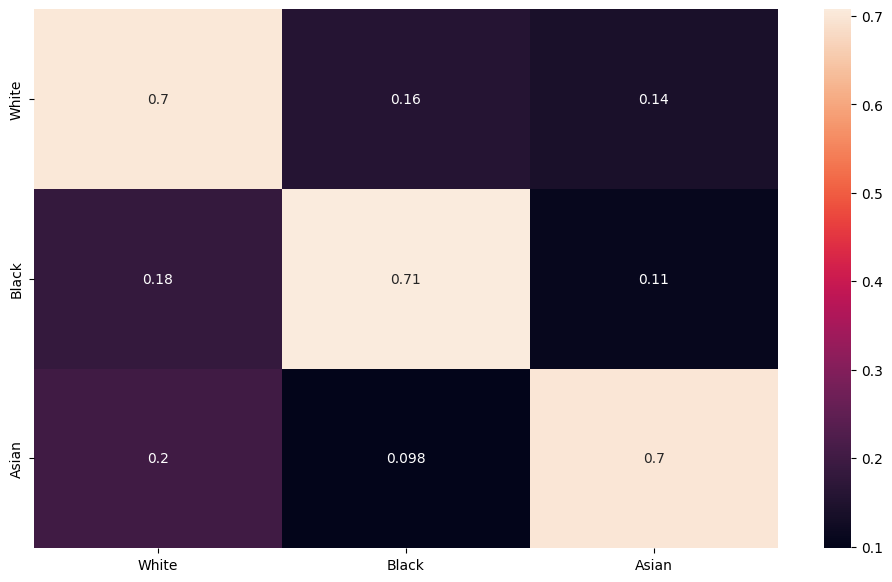

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
print(df_cm)
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Model Optimization

We will do hold-out optimization as our dataset is large enough that cross validation is not neccessary. Moreover, training times for the algorithm are expensive.

In [85]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from sklearn.model_selection import KFold
import time
from torchvision import models
from efficientnet_pytorch import EfficientNet

def train_epoch(model, trainloader, optimizer, loss_fn, print_every = 2000):

  training_loss = 0.0

  num_batches = len(trainloader)

  model.train()

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):

      X, y = data
      X = X.to(device)

      y = torch.flatten(y)
      y = y.to(torch.long)
      y = y.to(device)

      optimizer.zero_grad()

      y_hat = model(X)
      loss = loss_fn(y_hat, y)

      loss.backward()

      optimizer.step()

      training_loss += loss.item()
      running_loss += loss.item()
      
      if (i % 20 == 19):
        print("Batch ",i,"/",num_batches, " done! Training loss: ",running_loss/20)
        running_loss = 0.0

  return training_loss/num_batches

def test_epoch(model, testloader, loss_fn):
  correct = 0
  total = 0
  running_loss = 0.0
  num_batches = len(testloader)

  model.eval()

  with torch.no_grad():
      for data, label in testloader:

          X = data
          y = label
          X = X.to(device)

          y = torch.flatten(label)
          y = y.to(torch.long)
          y = y.to(device)

          y_hat = model(X)

          _, predicted = torch.max(y_hat.data, 1)

          # compute the accuracy
          total += y.size(0)
          correct += (predicted == y).sum().item()
          loss = loss_fn(y_hat, y)
          running_loss += loss.item()

  return correct/total, running_loss/num_batches

def optimize(train_loader,val_loader,lr_params,max_epochs=100,batch_size=BATCH_SIZE,loss_fn = nn.CrossEntropyLoss(), use_scheduler = False, print_every = 20):
  """
  So far this only optimizes the learning rate, ideally it would optimize more
  https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f
  a helpful example
  """

  begin = time.time()

  #train_data, val_data = random_split(train_dataset, [0.8*len(train_dataset), 0.2*len(train_dataset)])

  #train_loader = DataLoader(train_data, batch_size=batch_size)
  #val_loader = DataLoader(val_data, batch_size=batch_size)

  #stores the best loss, accuracy for each param value
  best_train_losses = []
  best_train_accs = []
  best_val_accs = []
  best_val_losses = []

  train_loss_history = []
  train_acc_history = []
  val_acc_history = []
  val_loss_history = []

  #model = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)

  model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_equal_frontal_10000_exp_lr.pth'

  model = models.resnet18(weights='IMAGENET1K_V1')

  num_ftrs = model.fc.in_features
  out_ftrs = 3
  model.fc = nn.Linear(num_ftrs, out_ftrs)

  checkpoint = torch.load(model_filename, map_location=device)
  print('Loading trained model weights...')
  model.load_state_dict(checkpoint['model_state_dict'],strict=False)

  model = model.to(device)

  for param in model.parameters():
      param.requires_grad = False

  for param in model.fc.parameters():
    param.requires_grad = True

  for lr_param in lr_params:

    print("Param value: ",lr_param)

    #holds best losses in each fold for particular param value
    #train_losses = []
    #valid_accs = []

    train_loss_history_param = []
    train_acc_history_param = []
    val_acc_history_param = []
    val_loss_history_param = []

    best_train_loss = 10000.0
    best_train_acc = 0.0
    best_val_loss = 10000.0
    best_val_acc = 0.0

    best_train_loss_epoch = 0
    best_train_acc_epoch = 0
    best_val_acc_epoch = 0
    best_val_loss_epoch = 0

    #NOT THE BEST WAY TO DO THIS
    #define the model each loop so it resets
    
    #model = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)
    
    """
    for param in model.parameters():
      param.requires_grad = False
    num_ftrs = model._fc.in_features
    model._fc = nn.Linear(num_ftrs, 3)
    """
    #model = models.resnet18(weights='IMAGENET1K_V1')
    #for param in model.parameters():
    #  param.requires_grad = False
    #num_ftrs = model.fc.in_features
    #out_ftrs = 3
    #model.fc = nn.Linear(num_ftrs, out_ftrs)
    #model = model.to(device)

    #I decided just to train the last linear layer since overfitting
    #optimizer = optim.Adam(model._fc.parameters(), lr=lr_param) #train last linear layer of efficientb4 which is called _fc, NOT fc
    optimizer = optim.Adam(model.parameters(), lr=lr_param)

    if use_scheduler:
      scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
      #scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=0.000005, verbose=True)

    for epoch in range(max_epochs):
    
      train_loss = train_epoch(model, train_loader, optimizer, loss_fn)
      train_acc, train_junk = test_epoch(model,train_loader,loss_fn)
      val_acc, val_loss = test_epoch(model, val_loader, loss_fn)

      if use_scheduler:
        #scheduler.step(val_loss)
        scheduler.step()

      train_loss_history_param.append(train_loss)
      train_acc_history_param.append(train_acc)
      val_acc_history_param.append(val_acc)
      val_loss_history_param.append(val_loss)

      if train_loss < best_train_loss:
        best_train_loss = train_loss
        best_train_acc_epoch = epoch
      if train_acc > best_train_acc:
        best_train_acc = train_acc
        best_train_acc_epoch = epoch

      if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_train_acc_epoch = epoch
      if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_val_acc_epoch = epoch

      if (epoch % print_every == 0):
        print("Epoch: ",epoch)
        print("Best train loss: ",best_train_loss)
        print("Best train accuracy: ",best_train_acc)
        print("Best validation accuracy: ",best_val_acc)
        print("Validation loss: ",val_loss)

    best_train_losses.append((best_train_loss_epoch,best_train_loss))
    best_train_accs.append((best_train_acc_epoch,best_train_acc))
    best_val_accs.append((best_val_acc_epoch,best_val_acc))
    best_val_losses.append((best_val_acc_epoch,best_val_acc))

    print("Best validation epoch: ",best_val_acc_epoch)
    print("Best training loss: ",(best_train_loss_epoch,best_train_loss))
    print("Best training accuracy: ",(best_train_acc_epoch,best_train_acc))
    print("Best validation accuracy: ",(best_val_acc_epoch,best_val_acc))

    train_loss_history.append(train_loss_history_param)
    train_acc_history.append(train_acc_history_param)
    val_acc_history.append(val_acc_history_param)
    val_loss_history.append(val_loss_history_param)

    print("\n")

  #outside parameterization loop
  #best losses amongst fold

  end = time.time()
  print(f'Finished optimizing in {round(end - begin)}s')

  print("Best param: ", lr_params)
  print("Best train loss: ",best_train_losses)
  print("Best train accuracy: ",best_train_accs)
  print("Best valid accuracy: ",best_val_accs)

  #NEED TO ADD val_loss_history
  return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

'  \ndef optimize(train_dataset,lr_params,max_epochs=100,batch_size=BATCH_SIZE):\n  \n  #So far this only optimizes the learning rate, ideally it would optimize more\n  #https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f\n  #a helpful example\n  \n\n  begin = time.time()\n\n  loss_fn = nn.CrossEntropyLoss()\n\n  k_folds = 5\n\n  splits=KFold(n_splits=k_folds,shuffle=True,random_state=42)\n\n  #best_param = lr_params[0]\n  #best_train_loss = 10.0\n  #best_valid_loss = 10.0\n  \n  best_train_losses = []\n  best_valid_losses = []\n\n  for lr_param in lr_params:\n\n    print("Param value: ",lr_param)\n\n    #holds best losses in each fold for particular param value\n    train_losses = []\n    valid_losses = []\n\n    for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(train_dataset)))):\n\n      print("Fold: ",fold)\n\n      train_sampler_epoch = SubsetRandomSampler(train_idx)\n      val_sampler_epoch = SubsetRandomSampler(val_idx)

We've decided to train all the parameters of the model as our assumption is that the ImageNet database will not have X-ray data. This of course does make us more vulnerable to overfitting.

We noticed in the original paper, they used a minimum learning rate of 1e-5 and initial of 0.0001. Adopting this, for the exponential learning rate we tested two gamma decays, 0.735 (which decays to 1e-5 after 10 epochs) and 0.8, which decays slightly slower.

The original paper also used a learning rate scheduler, and we have attempted to reproduce this with the same parameters.

In [ ]:
import time

BATCH_SIZE = 50

data_size = 10000

#train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal_frontal[:data_size], IMAGE_SIZE, True)
#val_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal_frontal[data_size:int(1.2*data_size)], IMAGE_SIZE, True)

train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal_frontal[:data_size], IMAGE_SIZE, True)
val_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal_frontal[-2500:], IMAGE_SIZE, True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

#train_data, val_data = random_split(train_dataset, [0.8*len(train_dataset), 0.2*len(train_dataset)])

loss_fn = nn.CrossEntropyLoss()

#lr_params = [0.0001,0.0005,0.001,0.005,0.01]
# lr_params = [0.0001,0.001,0.005,0.01]
#lr_params = [0.00001,0.0001,0.001,0.01]
lr_params = [0.001]
model, train_loss_history, train_acc_history, val_loss_history, val_acc_history = optimize(train_loader,
                                                                  val_loader,
                                                                  lr_params,
                                                                  max_epochs=8,
                                                                  batch_size = BATCH_SIZE, 
                                                                  loss_fn = loss_fn,
                                                                  use_scheduler = True, 
                                                                  print_every = 1)

Loading trained model weights...
Param value:  0.001
Batch  19 / 200  done! Training loss:  0.1528143562376499
Batch  39 / 200  done! Training loss:  0.1664441805332899
Batch  59 / 200  done! Training loss:  0.15741296280175449
Batch  79 / 200  done! Training loss:  0.17828873358666897
Batch  99 / 200  done! Training loss:  0.16379947625100613
Batch  119 / 200  done! Training loss:  0.19253771081566812
Batch  139 / 200  done! Training loss:  0.15879652025178076
Batch  159 / 200  done! Training loss:  0.1724318966269493
Batch  179 / 200  done! Training loss:  0.15257574059069157
Batch  199 / 200  done! Training loss:  0.20827685352414846
Epoch:  0
Best train loss:  0.17033784312196076
Best train accuracy:  0.949
Best validation accuracy:  0.8412
Validation loss:  0.5364894476532936
Batch  19 / 200  done! Training loss:  0.18965775817632674
Batch  39 / 200  done! Training loss:  0.15279387179762124
Batch  59 / 200  done! Training loss:  0.16380660533905028
Batch  79 / 200  done! Training

Text(0.5, 1.0, 'Loss: BWA Equal with Exponential Scheduler, $\\gamma=0.9$')

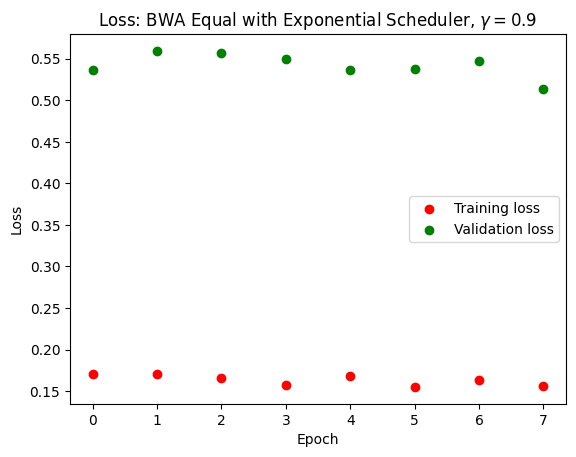

In [ ]:
import matplotlib.pyplot as plt
#loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_losses.pt'
loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_frontal_gamma09.pt'
loss_dict = torch.load(loss_file,map_location=torch.device('cpu'))
train_loss_history_file = loss_dict['train_loss_history']
val_loss_history_file = loss_dict['val_loss_history']
train_acc_history_file = loss_dict['train_acc_history']
val_acc_history_file = loss_dict['val_acc_history']

epoch_list = [i for i in range(8)]

plt.scatter(epoch_list,train_loss_history_file,c='Red', label = 'Training loss')
plt.scatter(epoch_list,val_loss_history_file,c='Green', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(r'Loss: BWA Equal with Exponential Scheduler, $\gamma=0.9$')

Text(0.5, 1.0, 'Loss: ResNet18, Self-Implementation, Exponential Scheduler')

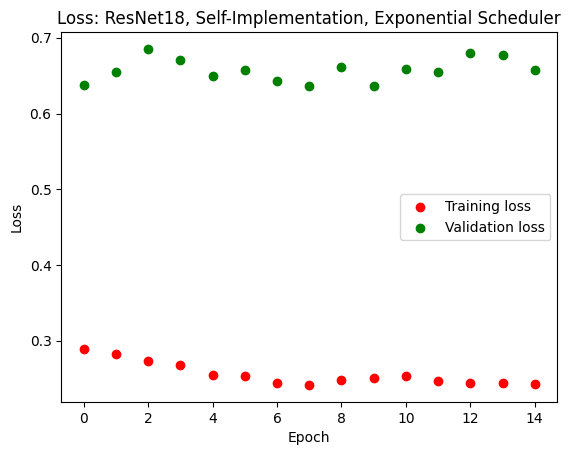

In [ ]:
import matplotlib.pyplot as plt
import torch
#loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_losses.pt'
loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/self_resnet18_bwa_frontal_exp_lr(4).pt'
loss_dict = torch.load(loss_file,map_location=torch.device('cpu'))
train_loss_history_file = loss_dict['train_loss_history']
val_loss_history_file = loss_dict['val_loss_history']
train_acc_history_file = loss_dict['train_acc_history']
val_acc_history_file = loss_dict['val_acc_history']

epoch_list = [i for i in range(len(val_loss_history_file[0]))]

plt.scatter(epoch_list,train_loss_history_file,c='Red', label = 'Training loss')
plt.scatter(epoch_list,val_loss_history_file,c='Green', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(r'Loss: ResNet18, Self-Implementation, Exponential Scheduler')

Text(0.5, 1.0, 'Score: ResNet18, Self-Implementation, Exponential Scheduler')

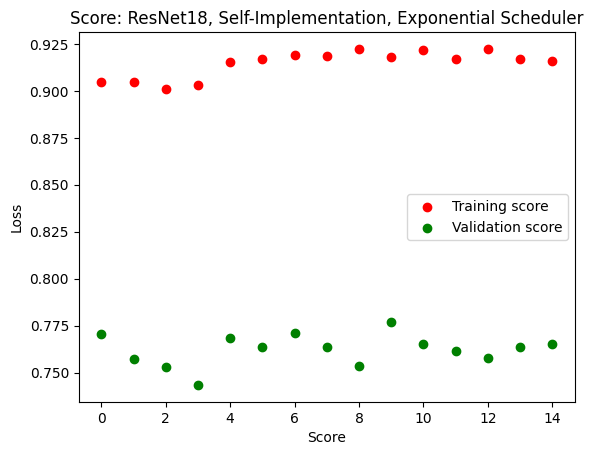

In [ ]:
plt.scatter(epoch_list,train_acc_history_file,c='Red', label = 'Training score')
plt.scatter(epoch_list,val_acc_history_file,c='Green', label = 'Validation score')
plt.xlabel('Score')
plt.ylabel('Loss')
plt.legend()
plt.title(r'Score: ResNet18, Self-Implementation, Exponential Scheduler')

In [ ]:
model_filename = "/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_frontal_gamma09.pth"

model_saved = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_saved.fc.in_features
model_saved.fc = nn.Linear(num_ftrs, 3) 
checkpoint = torch.load(model_filename, map_location=device)
print('Loading trained model weights...')
model_saved.load_state_dict(checkpoint['model_state_dict'],strict=False)

model_saved = model_saved.to(device)

test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_frontal[:2000], IMAGE_SIZE, True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=50, shuffle=False, num_workers=2, pin_memory=True)

y_pred_enet, y_true_enet = test(model_saved,test_dataloader)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 93.6MB/s]


Loading trained model weights...
tensor([0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0,
        2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1,
        0, 1], device='cuda:0')
predicted:  tensor([0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0,
        2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1,
        1, 1], device='cuda:0')
tensor([0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
        1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0,
        0, 1], device='cuda:0')
predicted:  tensor([0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2,
        1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0,
        2, 1], device='cuda:0')
tensor([2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
        0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2,
        2, 1], 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.9$, Both genders')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

NameError: ignored

In [ ]:
model_filename = "/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_frontal_gamma06.pth"

model_saved = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_saved.fc.in_features
model_saved.fc = nn.Linear(num_ftrs, 3) 
checkpoint = torch.load(model_filename, map_location=device)
print('Loading trained model weights...')
model_saved.load_state_dict(checkpoint['model_state_dict'],strict=False)

model_saved = model_saved.to(device)

test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_frontal[:2000], IMAGE_SIZE, True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=50, shuffle=False, num_workers=2, pin_memory=True)

y_pred_enet, y_true_enet = test(model_saved,test_dataloader)


Loading trained model weights...
tensor([0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0,
        2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1,
        0, 1])
predicted:  tensor([0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0,
        2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1,
        1, 1])
tensor([0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
        1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0,
        0, 1])
predicted:  tensor([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2,
        1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0,
        2, 1])
tensor([2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
        0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2,
        2, 1])
predicted:  tensor([2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 

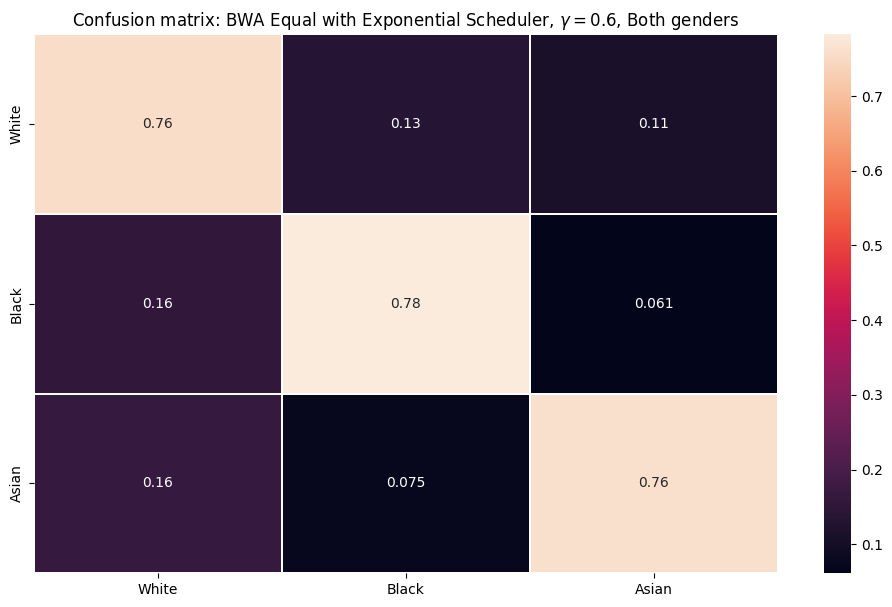

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)
# cm_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)

# print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.6$, Both genders')
sns.heatmap(df_cm, annot=True, linewidths = 0.01)
plt.savefig('output.png')

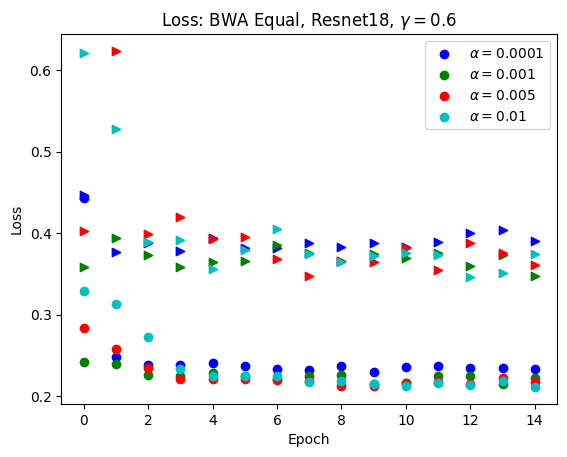

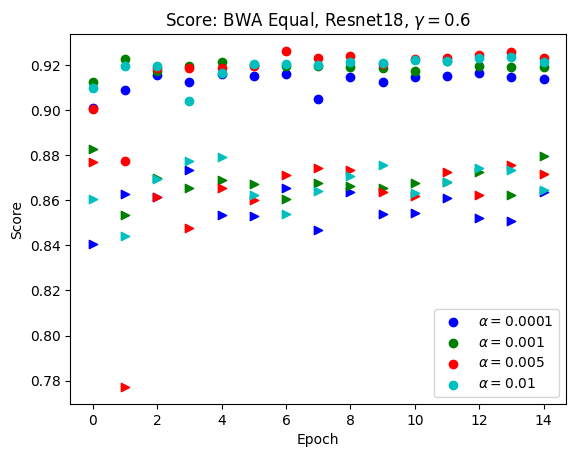

In [ ]:
import matplotlib.pyplot as plt

lr_params = [0.0001,0.001,0.005,0.01]
epoch_list = [i for i in range(15)]
color = ['b', 'g', 'r', 'c']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in range(4):
  ax1.scatter(epoch_list,train_loss_history[i], color = color[i],  label = r'$\alpha = $' + str(lr_params[i]))
  ax1.scatter(epoch_list,val_loss_history[i], marker = '>',color = color[i])
  ax2.scatter(epoch_list,train_acc_history[i], color = color[i], label = r'$\alpha = $' + str(lr_params[i]))
  ax2.scatter(epoch_list,val_acc_history[i], marker = '>',color = color[i])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Score')
ax1.set_title(r'Loss: BWA Equal, Resnet18, $\gamma = 0.6$')
ax2.set_title(r'Score: BWA Equal, Resnet18, $\gamma = 0.6$')
ax1.legend()
ax2.legend()
plt.show()

# Visualizing Feature Maps of Self-implemented Resnet18

In [ ]:
# Code influenced from: https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/
# image dir: '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'
# Patient used for demonstration: Patient00002 -> Female, classified as white
# script dir: '/content/drive/Shareddrives/CheXpert-v1.0-small/filters_and_maps.py'


%%writefile '/content/drive/Shareddrives/CheXpert-v1.0-small/filters_and_maps.py'

import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms

model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/self_resnet18_bwa_frontal_exp_lr(3).pth'

model_saved = torchvision.models.resnet18(num_classes=3)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model_saved = model_saved.to(device)

def load_model(filename, model, device):
  """
  Takes an untrained model as input, filename to saved model, and the device
  """
  checkpoint = checkpoint = torch.load(filename, map_location=device)
  model.load_state_dict(checkpoint['model_state_dict'],strict=False)
  model = model.to(device)
  return model

model_saved = load_model(model_filename, model_saved, device)

# Save layers and weights in an array
model_weights = []
conv_layers = []

# Get all model children
model_children = list(model_saved.children())


# Retrieve convolutional layers and their weights
# Counter to keep count of the conv layers
counter = 0 
# Append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)

# Visualizing conv layer filters
plt.figure(figsize=(20, 20))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='gray')
    plt.axis('off')
    # Store image in project directory
    images_dir = "/content/drive/Shareddrives/CheXpert-v1.0-small/outputs/white"
    plt.savefig(f"{images_dir}/filter.png")
plt.show()

# Reading image and defining transforms
image_dir = '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg'
img = cv.imread(image_dir)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

img = np.array(img)
# apply the transforms
img = transform(img)
# print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())

img = img.to(device)

# Passing input through each conv layer
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))

# make a copy of the `results`
outputs = results

# Visualizing feature map
# (although there are more feature maps in the upper layers)
for num_layer in range(len(outputs)):
    plt.figure(figsize=(20, 17))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"/content/drive/Shareddrives/CheXpert-v1.0-small/outputs/white/layer {num_layer}.png")
    # plt.show()
    plt.close()

Overwriting /content/drive/Shareddrives/CheXpert-v1.0-small/filters_and_maps.py


In [ ]:
!python '/content/drive/Shareddrives/CheXpert-v1.0-small/filters_and_maps.py' --image '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg'

Figure(2000x2000)
Figure(640x480)
torch.Size([1, 3, 512, 512])
torch.Size([64, 256, 256])
Saving layer 0 feature maps...
torch.Size([64, 256, 256])
Saving layer 1 feature maps...
torch.Size([64, 256, 256])
Saving layer 2 feature maps...
torch.Size([64, 256, 256])
Saving layer 3 feature maps...
torch.Size([64, 256, 256])
Saving layer 4 feature maps...
torch.Size([128, 128, 128])
Saving layer 5 feature maps...
torch.Size([128, 128, 128])
Saving layer 6 feature maps...
torch.Size([128, 128, 128])
Saving layer 7 feature maps...
torch.Size([128, 128, 128])
Saving layer 8 feature maps...
torch.Size([256, 64, 64])
Saving layer 9 feature maps...
torch.Size([256, 64, 64])
Saving layer 10 feature maps...
torch.Size([256, 64, 64])
Saving layer 11 feature maps...
torch.Size([256, 64, 64])
Saving layer 12 feature maps...
torch.Size([512, 32, 32])
Saving layer 13 feature maps...
torch.Size([512, 32, 32])
Saving layer 14 feature maps...
torch.Size([512, 32, 32])
Saving layer 15 feature maps...
torch.

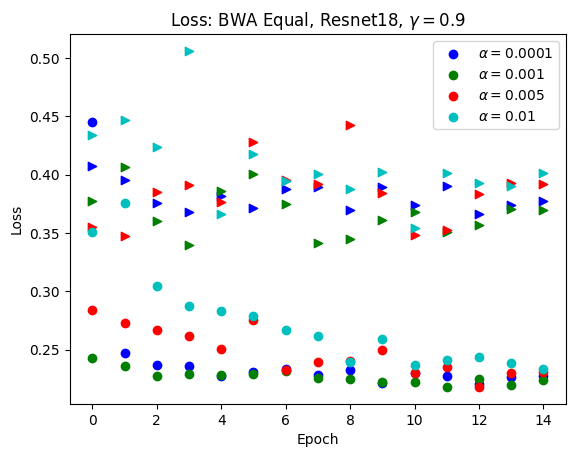

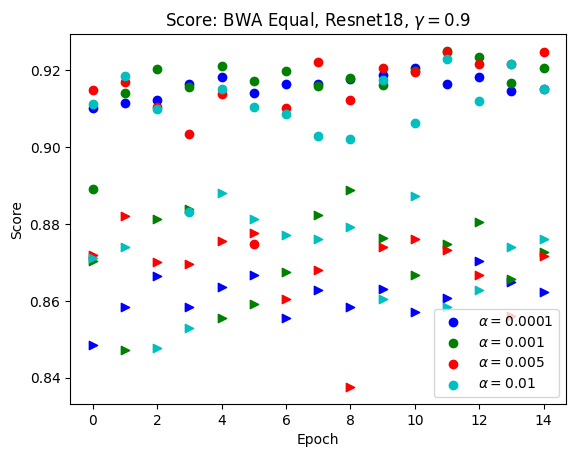

In [ ]:
import matplotlib.pyplot as plt

lr_params = [0.0001,0.001,0.005,0.01]
epoch_list = [i for i in range(15)]
color = ['b', 'g', 'r', 'c']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in range(4):
  ax1.scatter(epoch_list,train_loss_history[i], color = color[i],  label = r'$\alpha = $' + str(lr_params[i]))
  ax1.scatter(epoch_list,val_loss_history[i], marker = '>',color = color[i])
  ax2.scatter(epoch_list,train_acc_history[i], color = color[i], label = r'$\alpha = $' + str(lr_params[i]))
  ax2.scatter(epoch_list,val_acc_history[i], marker = '>',color = color[i])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Score')
ax1.set_title(r'Loss: BWA Equal, Resnet18, $\gamma = 0.9$')
ax2.set_title(r'Score: BWA Equal, Resnet18, $\gamma = 0.9$')
ax1.legend()
ax2.legend()
plt.show()

Just for safety I've commented out the destination filenames

In [ ]:
torch.save({
                'epoch': 15,
                'model_state_dict': model.state_dict()
                }, f"/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_frontal_gamma09.pth")

In [ ]:
#save the losses
torch.save({"train_loss_history": train_loss_history, "train_acc_history":train_acc_history, "val_loss_history": val_loss_history, "val_acc_history": val_acc_history}, '/content/drive/Shareddrives/CheXpert-v1.0-small/resnet18_bwa_frontal_gamma09.pt')

Text(0.5, 1.0, 'Loss: BWA Equal with Exponential Scheduler, $\\gamma=0.735$')

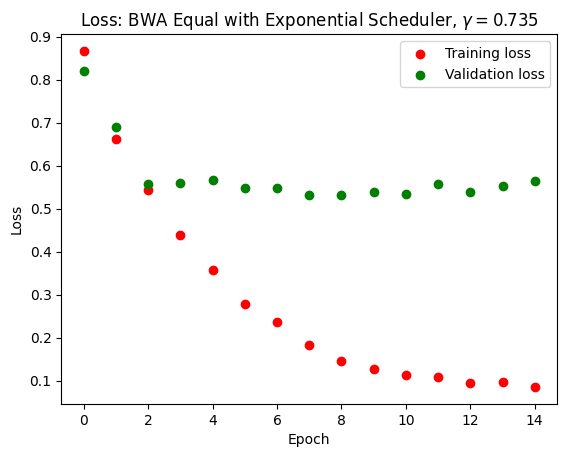

In [ ]:
import matplotlib.pyplot as plt
#loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_losses.pt'
loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler_losses.pt'
loss_dict = torch.load(loss_file,map_location=torch.device('cpu'))
train_loss_history_file = loss_dict['train_loss_history']
val_loss_history_file = loss_dict['val_loss_history']
train_acc_history_file = loss_dict['train_acc_history']
val_acc_history_file = loss_dict['val_acc_history']

epoch_list = [i for i in range(15)]

plt.scatter(epoch_list,train_loss_history_file,c='Red', label = 'Training loss')
plt.scatter(epoch_list,val_loss_history_file,c='Green', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(r'Loss: BWA Equal with Exponential Scheduler, $\gamma=0.735$')

Text(0.5, 1.0, 'Accuracy: BWA Equal with Exponential Scheduler, $\\gamma=0.735$')

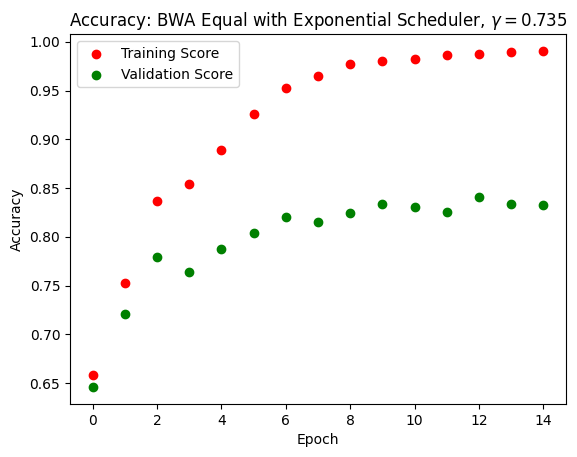

In [ ]:
plt.scatter(epoch_list,train_acc_history_file,c='Red', label = 'Training Score')
plt.scatter(epoch_list,val_acc_history_file,c='Green', label = 'Validation Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title(r'Accuracy: BWA Equal with Exponential Scheduler, $\gamma=0.735$')

Text(0.5, 1.0, 'Loss: BWA Equal with Learning Plateau Scheduler')

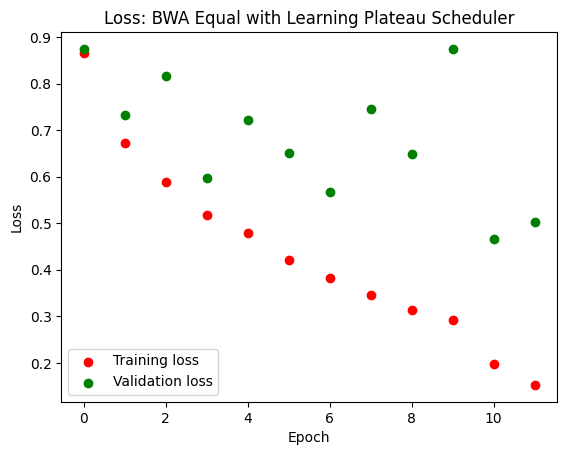

In [ ]:
loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_losses.pt'
#loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler_losses.pt'
loss_dict = torch.load(loss_file,map_location=torch.device('cpu'))
train_loss_history_file = loss_dict['train_loss_history']
val_loss_history_file = loss_dict['val_loss_history']
train_acc_history_file = loss_dict['train_acc_history']
val_acc_history_file = loss_dict['val_acc_history']

epoch_list = [i for i in range(12)]

plt.scatter(epoch_list,train_loss_history_file,c='Red', label = 'Training loss')
plt.scatter(epoch_list,val_loss_history_file,c='Green', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss: BWA Equal with Learning Plateau Scheduler')

Text(0.5, 1.0, 'Score: BWA Equal with Learning Plateau Scheduler')

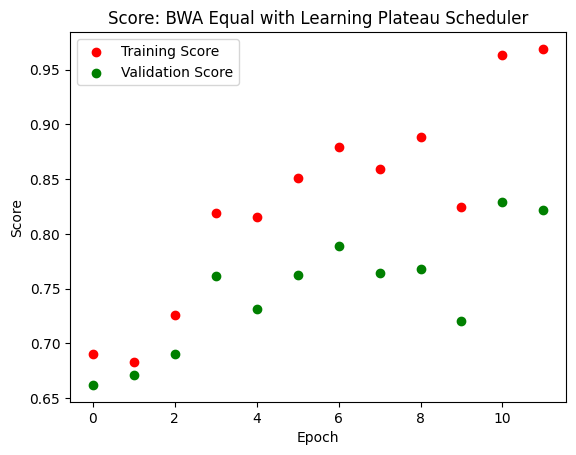

In [ ]:
plt.scatter(epoch_list,train_acc_history_file,c='Red', label = 'Training Score')
plt.scatter(epoch_list,val_acc_history_file,c='Green', label = 'Validation Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Score: BWA Equal with Learning Plateau Scheduler')

Text(0.5, 1.0, 'Loss: BWA Equal with Exponential Scheduler, $\\gamma=0.8$')

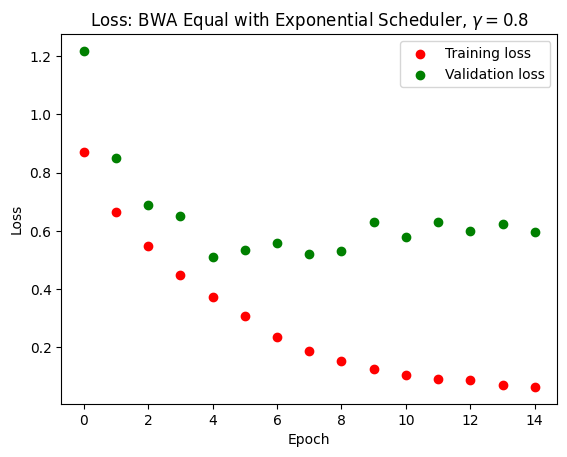

In [ ]:
loss_file = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler_losses(2).pt'
loss_dict = torch.load(loss_file,map_location=torch.device('cpu'))
train_loss_history_file = loss_dict['train_loss_history']
val_loss_history_file = loss_dict['val_loss_history']
train_acc_history_file = loss_dict['train_acc_history']
val_acc_history_file = loss_dict['val_acc_history']

epoch_list = [i for i in range(15)]

plt.scatter(epoch_list,train_loss_history_file,c='Red', label = 'Training loss')
plt.scatter(epoch_list,val_loss_history_file,c='Green', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(r'Loss: BWA Equal with Exponential Scheduler, $\gamma=0.8$')

Text(0.5, 1.0, 'Accuracy: BWA Equal with Exponential Scheduler, $\\gamma=0.8$')

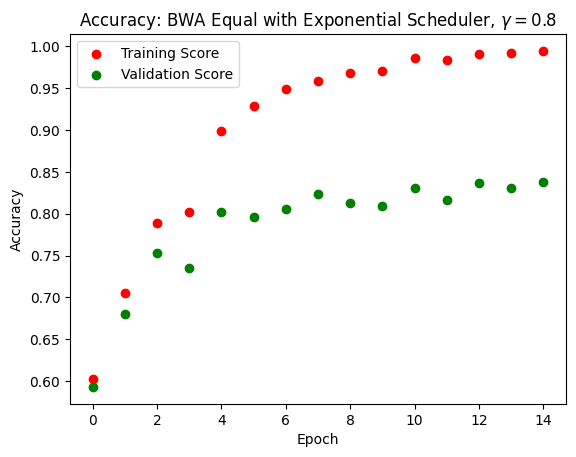

In [ ]:
plt.scatter(epoch_list,train_acc_history_file,c='Red', label = 'Training Score')
plt.scatter(epoch_list,val_acc_history_file,c='Green', label = 'Validation Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title(r'Accuracy: BWA Equal with Exponential Scheduler, $\gamma=0.8$')

So maybe we should ignore the model without a scheduler in our analysis because of its erratic loss evolution.

In [ ]:
df_test_bwa_equal_male = df_test_bwa_equal_frontal[df_test_bwa_equal_frontal['Sex'] == 'Male']
df_test_bwa_equal_female = df_test_bwa_equal_frontal[df_test_bwa_equal_frontal['Sex'] == 'Female']
df_test_bwa_equal_female

,Unnamed: 0.1,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
2,3766,104243,CheXpert-v1.0-small/train/patient25254/study4/...,Female,90,Frontal,AP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient25254,Female,92,Black or African American,Non-Hispanic/Non-Latino,1
4,9666,112659,CheXpert-v1.0-small/train/patient27288/study2/...,Female,41,Frontal,AP,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,patient27288,Female,42,"Black, non-Hispanic",Non-Hispanic/Non-Latino,1
11,12601,116650,CheXpert-v1.0-small/train/patient28228/study1/...,Female,21,Frontal,PA,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,patient28228,Female,19,Black or African American,Non-Hispanic/Non-Latino,1
16,536,99614,CheXpert-v1.0-small/train/patient24193/study5/...,Female,90,Frontal,AP,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,patient24193,Female,101,White,Non-Hispanic/Non-Latino,0
19,1032,100253,CheXpert-v1.0-small/train/patient24344/study12...,Female,37,Frontal,AP,NaN,NaN,-1.0,...,1.0,NaN,NaN,1.0,patient24344,Female,37,Asian,Non-Hispanic/Non-Latino,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,1366,100729,CheXpert-v1.0-small/train/patient24431/study1/...,Female,74,Frontal,AP,1.0,0.0,NaN,...,0.0,NaN,NaN,NaN,patient24431,Female,74,Asian,Non-Hispanic/Non-Latino,2
2986,7206,109367,CheXpert-v1.0-small/train/patient26501/study3/...,Female,53,Frontal,PA,NaN,-1.0,1.0,...,0.0,NaN,NaN,1.0,patient26501,Female,55,Black or African American,Non-Hispanic/Non-Latino,1
2995,1237,100534,CheXpert-v1.0-small/train/patient24400/study1/...,Female,29,Frontal,PA,1.0,0.0,NaN,...,0.0,NaN,NaN,NaN,patient24400,Female,29,Asian,Non-Hispanic/Non-Latino,2
2996,4244,104980,CheXpert-v1.0-small/train/patient25459/study1/...,Female,31,Frontal,PA,1.0,NaN,NaN,...,NaN,NaN,0.0,NaN,patient25459,Female,31,"Black, non-Hispanic",Non-Hispanic/Non-Latino,1


In [ ]:
import time

model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler.pth'

model_saved = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)

checkpoint = torch.load(model_filename, map_location=device)
print('Loading trained model weights...')
model_saved.load_state_dict(checkpoint['model_state_dict'],strict=False)

model_saved = model_saved.to(device)

test_dataset_male = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_male[:500], IMAGE_SIZE, True)
test_dataloader_male = DataLoader(dataset=test_dataset_male, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

test_dataset_female = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_female[:500], IMAGE_SIZE, True)
test_dataloader_female = DataLoader(dataset=test_dataset_female, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

y_pred_enet_male, y_true_enet_male = test(model_saved,test_dataloader_male)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 22.2MB/s]


Loaded pretrained weights for efficientnet-b0
Loading trained model weights...


NameError: ignored

[[159  26  22]
 [ 27 101   7]
 [ 23  13 122]]


Exception ignored in: <function _ConnectionBase.__del__ at 0x7f1875e66dd0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


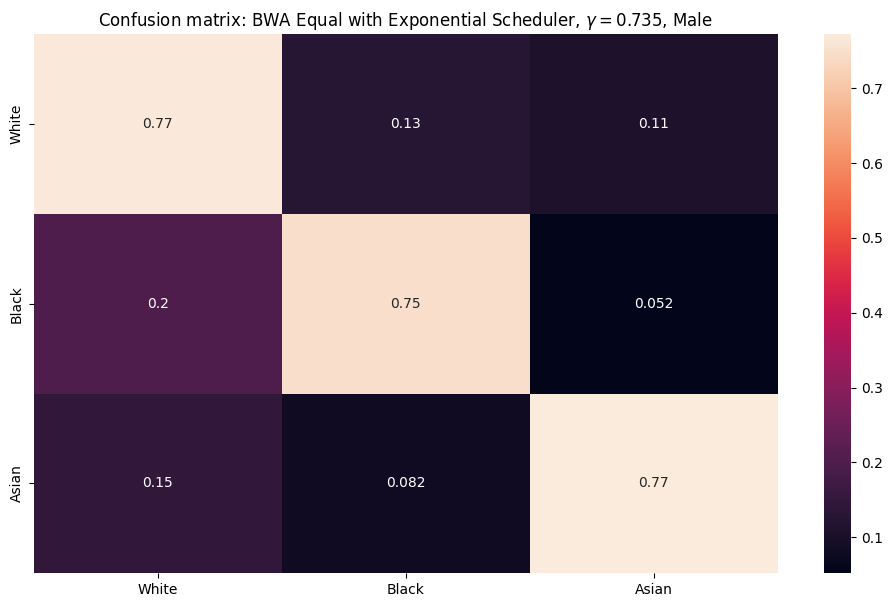

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_true_enet_male, y_pred_enet_male)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.735$, Male')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

tensor([1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2,
        1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0,
        1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0,
        0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2,
        2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
        2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2,
        1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
        0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2,
        1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2,
        0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2,
        2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,

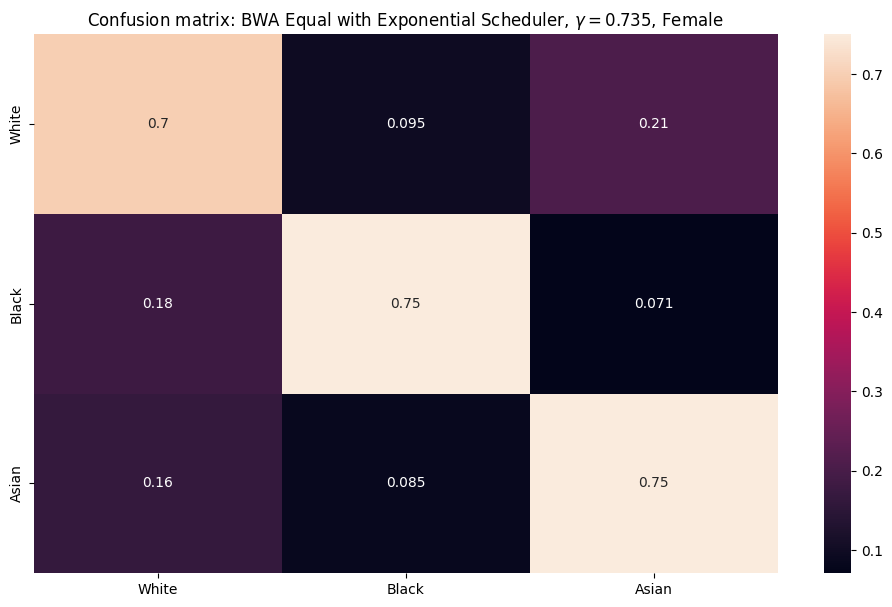

In [ ]:
y_pred_enet_female, y_true_enet_female = test(model_saved,test_dataloader_female)
cf_matrix = confusion_matrix(y_true_enet_female, y_pred_enet_female)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.735$, Female')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Bias for the set that Jay-U trained the 0.735 scheduler model on.

Ratio of men to women in the training set for the model with the 0.735 gamma scheduler is: 1.335, or 57.18% men and 42.82% women.
There are on average 0.787 frontal images for each male patient, and 0.805 for each female patient.
There are on average 0.213 lateral images for each male patient, and 0.195 for each female patient.


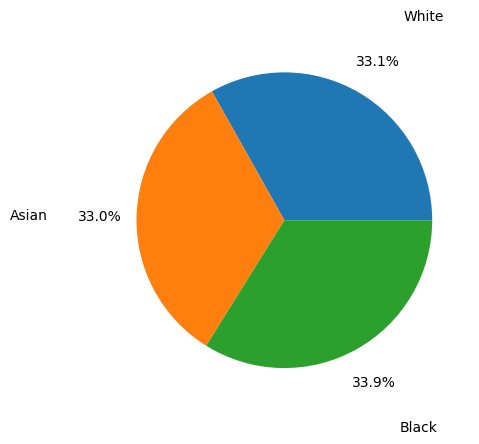

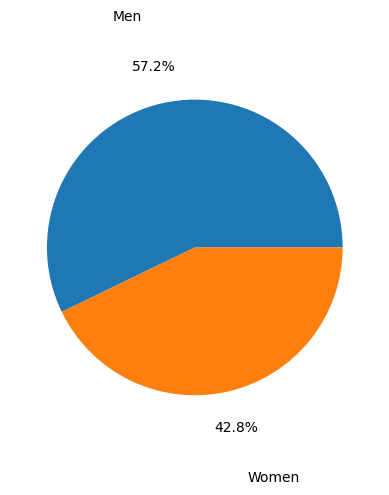

In [ ]:
df_check = df_train_bwa_equal[:10000]
df_male = df_check[df_check['Sex'] == 'Male']
df_female = df_check[df_check['Sex'] == 'Female']
male_no = len(df_male)
fem_no = len(df_female)
male_ratio = male_no/(male_no+fem_no)*100
fem_ratio = fem_no/(male_no+fem_no)*100
print('Ratio of men to women in the training set for the model with the 0.735 gamma scheduler is: ' + str(round(male_no/fem_no, 3)) + ', or ' + str(round(male_ratio, 3)) + '% men and ' + str(round(fem_ratio, 3)) +'% women.')
frontal_male = len(df_male[df_male['Path'].str.contains('frontal')])/male_no
frontal_female = len(df_female[df_female['Path'].str.contains('frontal')])/fem_no
print('There are on average ' + str(round(frontal_male, 3)) + ' frontal images for each male patient, and ' + str(round(frontal_female, 3)) + ' for each female patient.')
lateral_male = len(df_male[df_male['Path'].str.contains('lateral')])/male_no
lateral_female = len(df_female[df_female['Path'].str.contains('lateral')])/fem_no
print('There are on average ' + str(round(lateral_male, 3)) + ' lateral images for each male patient, and ' + str(round(lateral_female, 3)) + ' for each female patient.')

white_no = (df_check['PRIMARY_RACE'].str.contains('White')).sum()
black_no = (df_check['PRIMARY_RACE'].str.contains('Black')).sum()
asian_no = (df_check['PRIMARY_RACE'].str.contains('Asian')).sum()

labels = ['White', 'Asian', 'Black']
sizes = [white_no, asian_no, black_no]
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.pie(sizes, labels = labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=1.6)
ax2.pie([male_no, fem_no], labels = ['Men', 'Women'] , autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=1.6)
plt.show()


In [ ]:
df_test_bwa_equal_male = df_test_bwa_equal_frontal[df_test_bwa_equal['Sex'] == 'Male']
df_test_bwa_equal_female = df_test_bwa_equal_frontal[df_test_bwa_equal['Sex'] == 'Female']
df_test_bwa_equal_female

<ipython-input-12-4ccdc779abab>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_bwa_equal_male = df_test_bwa_equal_frontal[df_test_bwa_equal['Sex'] == 'Male']
<ipython-input-12-4ccdc779abab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_bwa_equal_female = df_test_bwa_equal_frontal[df_test_bwa_equal['Sex'] == 'Female']


,Unnamed: 0.1,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
2,3766,104243,CheXpert-v1.0-small/train/patient25254/study4/...,Female,90,Frontal,AP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient25254,Female,92,Black or African American,Non-Hispanic/Non-Latino,1
4,9666,112659,CheXpert-v1.0-small/train/patient27288/study2/...,Female,41,Frontal,AP,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,patient27288,Female,42,"Black, non-Hispanic",Non-Hispanic/Non-Latino,1
11,12601,116650,CheXpert-v1.0-small/train/patient28228/study1/...,Female,21,Frontal,PA,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,patient28228,Female,19,Black or African American,Non-Hispanic/Non-Latino,1
16,536,99614,CheXpert-v1.0-small/train/patient24193/study5/...,Female,90,Frontal,AP,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,patient24193,Female,101,White,Non-Hispanic/Non-Latino,0
19,1032,100253,CheXpert-v1.0-small/train/patient24344/study12...,Female,37,Frontal,AP,NaN,NaN,-1.0,...,1.0,NaN,NaN,1.0,patient24344,Female,37,Asian,Non-Hispanic/Non-Latino,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,1366,100729,CheXpert-v1.0-small/train/patient24431/study1/...,Female,74,Frontal,AP,1.0,0.0,NaN,...,0.0,NaN,NaN,NaN,patient24431,Female,74,Asian,Non-Hispanic/Non-Latino,2
2986,7206,109367,CheXpert-v1.0-small/train/patient26501/study3/...,Female,53,Frontal,PA,NaN,-1.0,1.0,...,0.0,NaN,NaN,1.0,patient26501,Female,55,Black or African American,Non-Hispanic/Non-Latino,1
2995,1237,100534,CheXpert-v1.0-small/train/patient24400/study1/...,Female,29,Frontal,PA,1.0,0.0,NaN,...,0.0,NaN,NaN,NaN,patient24400,Female,29,Asian,Non-Hispanic/Non-Latino,2
2996,4244,104980,CheXpert-v1.0-small/train/patient25459/study1/...,Female,31,Frontal,PA,1.0,NaN,NaN,...,NaN,NaN,0.0,NaN,patient25459,Female,31,"Black, non-Hispanic",Non-Hispanic/Non-Latino,1


In [ ]:
import time

model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler.pth'

model_saved = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)

checkpoint = torch.load(model_filename, map_location=device)
print('Loading trained model weights...')
model_saved.load_state_dict(checkpoint['model_state_dict'],strict=False)

model_saved = model_saved.to(device)

test_dataset_male = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_male[:2500], IMAGE_SIZE, True)
test_dataloader_male = DataLoader(dataset=test_dataset_male, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

test_dataset_female = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_female[:2500], IMAGE_SIZE, True)
test_dataloader_female = DataLoader(dataset=test_dataset_female, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

y_pred_enet_male, y_true_enet_male = test(model_saved,test_dataloader_male)


Loaded pretrained weights for efficientnet-b0
Loading trained model weights...
tensor([0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0],
       device='cuda:0')
predicted:  tensor([0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2],
       device='cuda:0')
tensor([2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2],
       device='cuda:0')
tensor([2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0],
       device='cuda:0')
tensor([2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2],
       device='cuda:0')
predicted:  tensor([2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2],
       device='cuda:0')
tensor([1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2],
       device='cuda:0')
predicted:  tensor([1, 2, 0, 2, 0, 1

In [ ]:
cf_matrix = confusion_matrix(y_true_enet_male, y_pred_enet_male)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
                     
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.735$, 2500 male patients, both frontal and lateral')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

NameError: ignored

In [ ]:
y_pred_enet_female, y_true_enet_female = test(model_saved,test_dataloader_female)

tensor([1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0],
       device='cuda:0')
predicted:  tensor([1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0],
       device='cuda:0')
tensor([2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1],
       device='cuda:0')
predicted:  tensor([2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1],
       device='cuda:0')
tensor([1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2],
       device='cuda:0')
predicted:  tensor([1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2],
       device='cuda:0')
tensor([2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2],
       device='cuda:0')
tensor([1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2],
       device='cuda:0')
predicted:  tensor([1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2],
       device='cuda:0')
tensor([1,

[[179  32  41]
 [ 60 268  26]
 [ 50  20 256]]


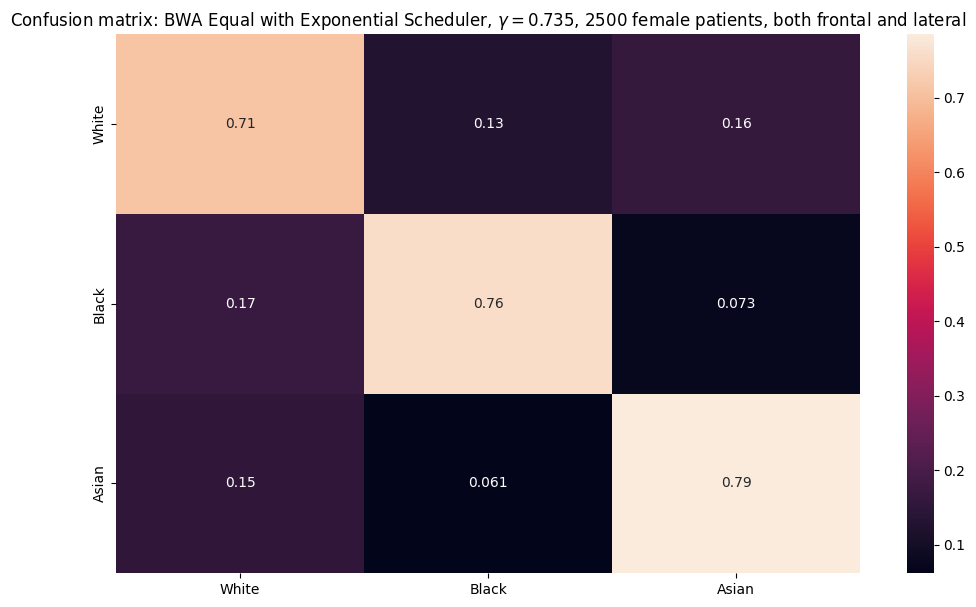

In [ ]:
cf_matrix = confusion_matrix(y_true_enet_female, y_pred_enet_female)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.735$, 2500 female patients, both frontal and lateral')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
model_filename = '/content/drive/Shareddrives/CheXpert-v1.0-small/efficientb0_10000_bwa_equal_exponential_scheduler(2).pth'

model_saved = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)

checkpoint = torch.load(model_filename, map_location=device)
print('Loading trained model weights...')
model_saved.load_state_dict(checkpoint['model_state_dict'],strict=False)

model_saved = model_saved.to(device)

test_dataset_male = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_male[:500], IMAGE_SIZE, True)
test_dataloader_male = DataLoader(dataset=test_dataset_male, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

test_dataset_female = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal_female[:500], IMAGE_SIZE, True)
test_dataloader_female = DataLoader(dataset=test_dataset_female, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

y_pred_enet_male, y_true_enet_male = test(model_saved,test_dataloader_male)


Loaded pretrained weights for efficientnet-b0
Loading trained model weights...
tensor([0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0],
       device='cuda:0')
predicted:  tensor([0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2],
       device='cuda:0')
tensor([2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2],
       device='cuda:0')
tensor([2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0],
       device='cuda:0')
tensor([2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2],
       device='cuda:0')
predicted:  tensor([2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
tensor([1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2],
       device='cuda:0')
predicted:  tensor([1, 2, 0, 2, 1, 1

[[168  20  19]
 [ 27 105   3]
 [ 33  12 113]]


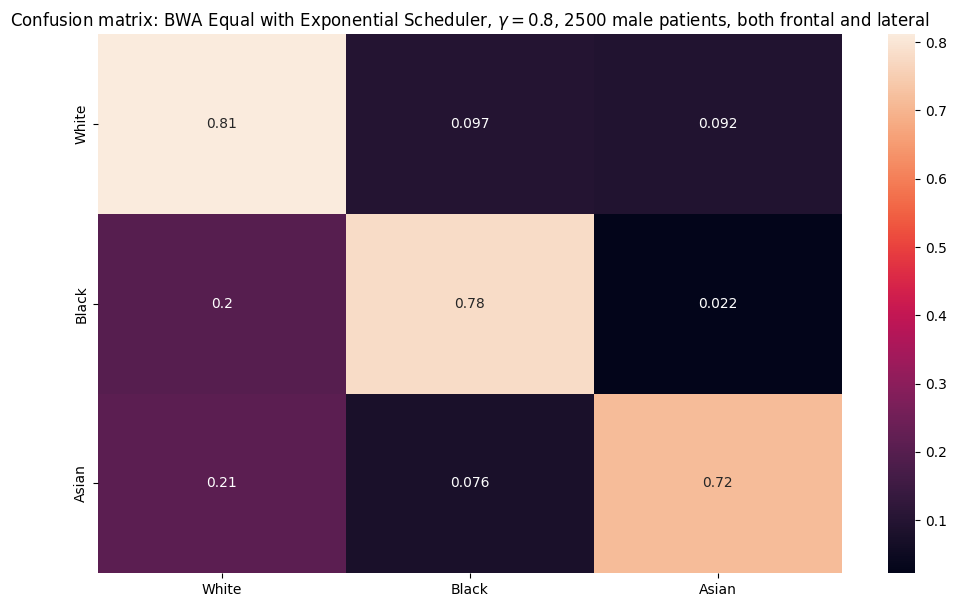

In [ ]:
cf_matrix = confusion_matrix(y_true_enet_male, y_pred_enet_male)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.8$, 2500 male patients, both frontal and lateral')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
y_pred_enet_female, y_true_enet_female = test(model_saved,test_dataloader_female)

tensor([1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0],
       device='cuda:0')
predicted:  tensor([1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0],
       device='cuda:0')
tensor([2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1],
       device='cuda:0')
predicted:  tensor([1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1],
       device='cuda:0')
tensor([1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2],
       device='cuda:0')
predicted:  tensor([1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2],
       device='cuda:0')
tensor([2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2],
       device='cuda:0')
predicted:  tensor([2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0],
       device='cuda:0')
tensor([1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2],
       device='cuda:0')
predicted:  tensor([1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2],
       device='cuda:0')
tensor([1,

[[ 92  16  18]
 [ 33 153  12]
 [ 32  15 129]]


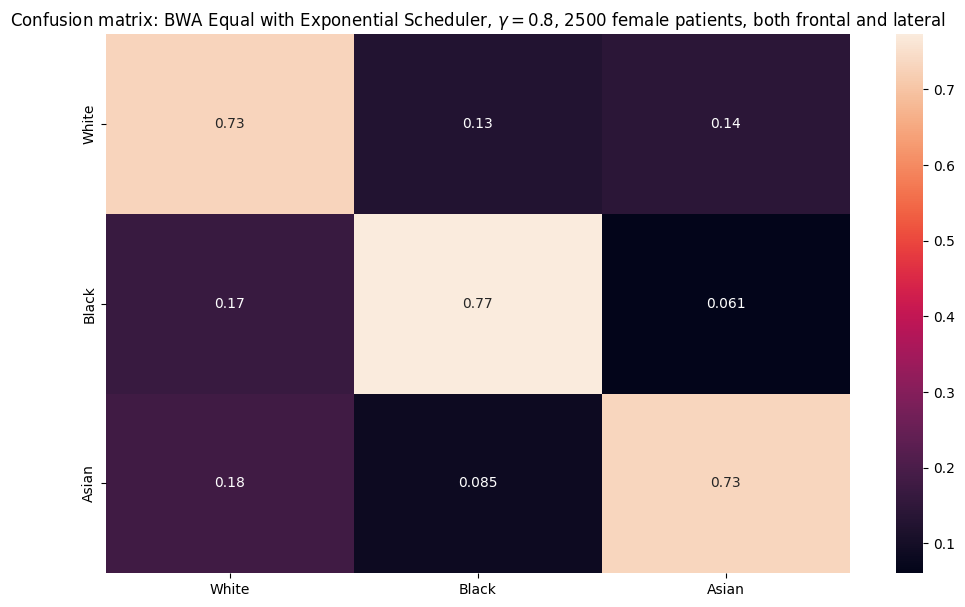

In [ ]:
cf_matrix = confusion_matrix(y_true_enet_female, y_pred_enet_female)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title(r'Confusion matrix: BWA Equal with Exponential Scheduler, $\gamma = 0.8$, 2500 female patients, both frontal and lateral')
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
lr_params = [0.0001,0.0005,0.001,0.005,0.01]
optimize(train_dataset,lr_params,max_epochs=25)

Param value:  0.0001
Fold:  0


Resnet Self-Implementation

In [ ]:
import torch.nn as nn
import torch.nn.functional as F #this is for relu

class ConvNet(nn.Module): #inherits from nn.module

  def __init__(self):
    super().__init__() #run init method of parent class

    """
    Let's just define the functions we'll use later for forward
    """

    self.conv1 = nn.Conv2d(3, 100, 5) #3 input channels for rgb, 100 convolutional kernels, all size 5 by 5
    self.conv2 = nn.Conv2d(100, 50, 3)
    self.conv3 = nn.Conv2d(50, 20, 3)

    self.pool = nn.MaxPool2d(2,2) #largest pixel value from each 2 by 2 window
    self.fc1 = nn.Linear(13520,80)
    self.fc2 = nn.Linear(80,40)
    self.fc3 = nn.Linear(40,2) #only two outputs for the binary cat/dog label

  def forward(self,x):
    print('x_shape:',x.shape)
    x = self.pool(F.relu(self.conv1(x))) #do kernel convolution to x, then do relu, then do max pooling
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))

    print('x_shape:',x.shape)

    #DO NOT FORGET TO FLATTEN BEFORE LINEAR LAYERS

    x = torch.flatten(x,1)

    print('x_shape:',x.shape)

    x = F.relu(self.fc1(x))

    print('x_shape:',x.shape)

    x = F.relu(self.fc2(x))

    print('x_shape:',x.shape)

    x = self.fc3(x) #just return the output, no nonlinear lyaers

    print('x_shape:',x.shape)

    return x

model = ConvNet().to(device)

import torch
torch.cuda.empty_cache()

train(model, train_dataloader, optimizer, k_epochs = 100, print_every = 50)

In [59]:
#references https://arxiv.org/pdf/1512.03385.pdf, original resnet paper
# and https://blog.paperspace.com/writing-resnet-from-scratch-in-pytorch/ for pointers on code
# https://github.com/microsoft/nni/blob/master/examples/trials/cifar10_pytorch/models/resnet.py

import torch
import torch.nn as nn

class Resnet(nn.Module):
  """
  for now I'm doing the 34 version
  """
  def __init__(self, num_classes):

    super(Resnet,self).__init__() #is (Resnet,self) necessary?

    #want to take matrix 224*224 to 112*112, padding 3 ensures that each kernel 
    # centered on pixel in matrix, stride =2 makes it every other pixel, hence dimension is half
    self.conv1 = nn.Sequential(
      nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, stride = 2, padding=3), 
      nn.BatchNorm2d(num_features = 64),
      nn.ReLU()
    )
    #now do 3 by 3 max pool, similarly need padding 1 to make sure kernel
    # centered on each pixel, stride=2 make it other pixel, dimension 56*56
    self.maxpool = nn.MaxPool2d(kernel_size = 3,stride=2,padding=1) #not sure why there is padding

    #each time we reduce the size of the matrix by half, hence stride of 2 (for conv2_x, maxpool reduced dimension)
    self.conv2_x = self.make_conv_layer(64,64,kernel_size = 3, stride = 1, num_layers = 3)
    self.conv3_x = self.make_conv_layer(64,128,kernel_size = 3, stride = 2, num_layers = 4)
    self.conv4_x = self.make_conv_layer(128,256,kernel_size = 3, stride = 2, num_layers = 6)
    self.conv5_x = self.make_conv_layer(256,512,kernel_size = 3, stride = 2, num_layers = 3)

    #size is now [512,7,7], want it to be [512,1,1] so kernel size 7
    #self.avgpool = nn.AvgPool2d(kernel_size = 7,stride = 1) #no idea why this is 7
    self.avgpool = nn.AdaptiveAvgPool2d((1,1)) #this is what preloaded resnet34 has

    self.fc = nn.Linear(512,num_classes)

  #this is specific to resnet 34
  def make_conv_layer(self,in_channels, out_channels, kernel_size, stride, num_layers):
    #conv 1 - 64 out, conv2 - 64 in 64 out, 64 in 64 out, 64 in 64 out, conv3 - 64 in 128 out, 128 in 128 out
    
    layer_list = []

    in_ch = in_channels
  
    # first block is input stride, reset are stride of 1

    layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride))
    in_ch = out_channels

    for i in range(1,num_layers):
      layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride=1))

    return nn.Sequential(*layer_list)

  def forward(self,x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2_x(x)
    x = self.conv3_x(x)
    x = self.conv4_x(x)
    x = self.conv5_x(x)
    x = self.avgpool(x)
    
    #x = torch.flatten(x)
    x = x.view(x.size(0), -1) #not sure why but flatten doesn't work
    x = self.fc(x)
    return x


class ResidualBlock(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size,stride):
    """
    Some math, input kernel to conv2_x is [64,56,56], can just do stride 1, size maintained
    Input kernel to conv3_x is [64,56,56] want [128,28,28], after convolutions x is [128,28,28] (stride 2 at first then stride 1),
    But x is still [64,56,56], so no padding, use kernel size 1 with 128 outchannels and stride 2
    """

    super(ResidualBlock,self).__init__()
    #again note padding here is 1 because kernel is 3 by 3
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = 3, stride = stride, padding = 1),
        nn.BatchNorm2d(num_features = out_channels),
        nn.ReLU()
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels = out_channels, out_channels = out_channels, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(num_features = out_channels) #don't do ReLU here since we might downsample
    )

    self.skip_connection = nn.Sequential() #identity

    #idea here is that skip_connection will add the input x to itself
    # but if stride != 1 or in_channels != out_channels, we need to change dimensions of x
    # so that the dimensions of x after conv1 and conv2 applied
    if stride != 1 or in_channels != out_channels:
      self.skip_connection = nn.Sequential(
          nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=stride),
          nn.BatchNorm2d(num_features = out_channels)
      )
    self.ReLU = nn.ReLU()

  def forward(self,x):
    x_layer = self.conv1(x)
    x_layer = self.conv2(x_layer)
    x_layer += self.skip_connection(x)
    x_layer = self.ReLU(x_layer)
    return x_layer

    
